In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cycler import cycler
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

# Config

In [4]:
site = "Mahurangi"
case = rf"{site}-2024-03-30"
n_criteria = 3
quantiles = [5, 50, 95]
home_dir = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis"
color = ["#bcbcbc", "#3388b6", "#ff993e"]
mpl.rcParams['axes.prop_cycle'] = cycler(color=color)

# Load and plot evaluation metrics values

In [5]:
input_dir = os.path.join(home_dir, "4_GLUE_postrun", "results", case)
output_dir = os.path.join(home_dir, "5_post_analysis", "results", "GLUEpost",case)
if not os.path.exists(output_dir):
   os.makedirs(output_dir)

senario_names = ['KGE on Flow', 'KGE on flow + KGE on soil moisture', 'KGE on flow + Soil moisture seasonal timing error']
senario_short_names = ['Scenario Reference', 'Scenario SM1', 'Scenario SM2']

## Load evaluation results

In [6]:
data_types = {'KGE on Flow_Behavioral': 'bool', 'KGE on Soil_Behavioral': 'bool', 'GLUE_results_Behavioral': 'bool', 'SeasonTrans of Soil wet2dry_end_Behavioral':'bool'}
for i in range(1, n_criteria+1):
    _eval_results = pd.read_csv(os.path.join(input_dir, f'criteria_{i}', 'post_evaluations.csv'), index_col=0, dtype=data_types)
    _eval_results['criteria_id'] = i
    if i==1:
        eval_results = _eval_results
    else:
        eval_results = pd.concat([eval_results, _eval_results])

eval_results

,NSE on Flow,NSE on Soil,KGE on Flow,KGE on Soil,SeasonTrans of Soil dry2wet_start,SeasonTrans of Soil dry2wet_end,SeasonTrans of Soil wet2dry_start,SeasonTrans of Soil wet2dry_end,SeasonTrans of Soil dry2wet_start_raw,SeasonTrans of Soil dry2wet_end_raw,SeasonTrans of Soil wet2dry_start_raw,SeasonTrans of Soil wet2dry_end_raw,KGE on Flow_Behavioral,GLUE_results_Behavioral,criteria_id,KGE on Soil_Behavioral,SeasonTrans of Soil dry2wet_start_Behavioral,SeasonTrans of Soil dry2wet_end_Behavioral,SeasonTrans of Soil wet2dry_start_Behavioral,SeasonTrans of Soil wet2dry_end_Behavioral
run_id,,,,,,,,,,,,,,,,,,,,
0,0.870583,-0.116197,0.879833,0.723320,0.898833,32.207192,0.077867,1.788701,"[15.947310891002417, 5.507696024607867, -18.75...","[-62.58391141379252, -14.955658408813179, -19....","[3.553183412645012, 5.564178702421486, -9.3509...","[2.839305623434484, -7.19964348943904, -1.0057...",True,True,1,NaN,NaN,NaN,NaN,NaN
2,0.742028,-1.650655,0.783288,0.794262,2.027438,30.647320,0.391725,8.624781,"[18.15436767693609, 6.544598508160561, -18.616...","[-60.39012540364638, -10.609820154961199, -20....","[3.6848616492934525, 4.674633755348623, -7.184...","[17.2484363601543, 1.0754332607612014, 7.55047...",True,True,1,NaN,NaN,NaN,NaN,NaN
3,0.869110,0.677258,0.873533,0.816237,2.029368,30.500882,0.682203,4.121407,"[17.889151433017105, 6.2895186031237245, -18.0...","[-60.24108660873026, -11.23238810757175, -20.0...","[4.616347371600568, 5.564206396695226, -8.1339...","[7.981033302843571, -2.0500190486200154, 6.433...",True,True,1,NaN,NaN,NaN,NaN,NaN
6,0.885031,-1.240381,0.838710,0.476138,7.209802,10.672729,8.320244,36.592321,"[23.50464104535058, 13.580517184454948, -15.45...","[-35.17803863529116, 12.557064292952418, -9.39...","[11.951880872715265, 4.970296945888549, 8.0385...","[33.30328246532008, 37.14795339619741, 39.3257...",True,True,1,NaN,NaN,NaN,NaN,NaN
7,0.875218,-3.525154,0.873582,0.735918,5.735942,23.454017,3.087982,24.516705,"[24.084008362144232, 9.318390148691833, -16.19...","[-53.26626322371885, 1.721834641881287, -18.81...","[7.352020290214568, 4.966070482041687, -3.0541...","[24.73943949304521, 19.056498429737985, 29.754...",True,True,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987,0.761133,-5.321136,0.781231,0.641435,6.826053,22.963124,4.433428,28.844364,"[25.817860189359635, 10.581929861567914, -15.9...","[-52.95919507369399, 3.9471170408651233, -19.8...","[8.96860796539113, 4.294641451910138, 0.037033...","[29.136098374146968, 25.074978570453823, 32.32...",True,True,3,NaN,True,True,True,True
99991,0.827383,0.787812,0.784467,0.894829,4.503455,26.096055,1.765091,20.631825,"[22.010245317127556, 8.249740751460195, -16.74...","[-55.021088915877044, -2.203782182186842, -21....","[6.042078174650669, 4.564188603777438, -5.3109...","[22.933977227192372, 14.045204403344542, 24.91...",True,True,3,NaN,True,True,True,True
99992,0.860223,0.749308,0.884464,0.818927,5.307766,25.050380,2.787674,25.191607,"[23.64135987404734, 8.981632163748145, -16.699...","[-54.29075924633071, 0.5267877522855997, -21.3...","[7.69512206222862, 3.788741203956306, -3.12084...","[27.31155404355377, 20.009992099832743, 28.253...",True,True,3,NaN,True,True,True,True


In [7]:
eval_results.groupby("criteria_id").count()["GLUE_results_Behavioral"]

criteria_id
1    91324
2    61063
3    30737
Name: GLUE_results_Behavioral, dtype: int64

In [8]:
data_np = eval_results['SeasonTrans of Soil dry2wet_start'].copy().values
x = np.sort(data_np)

## Plot evaluation results

stop
stop
stop


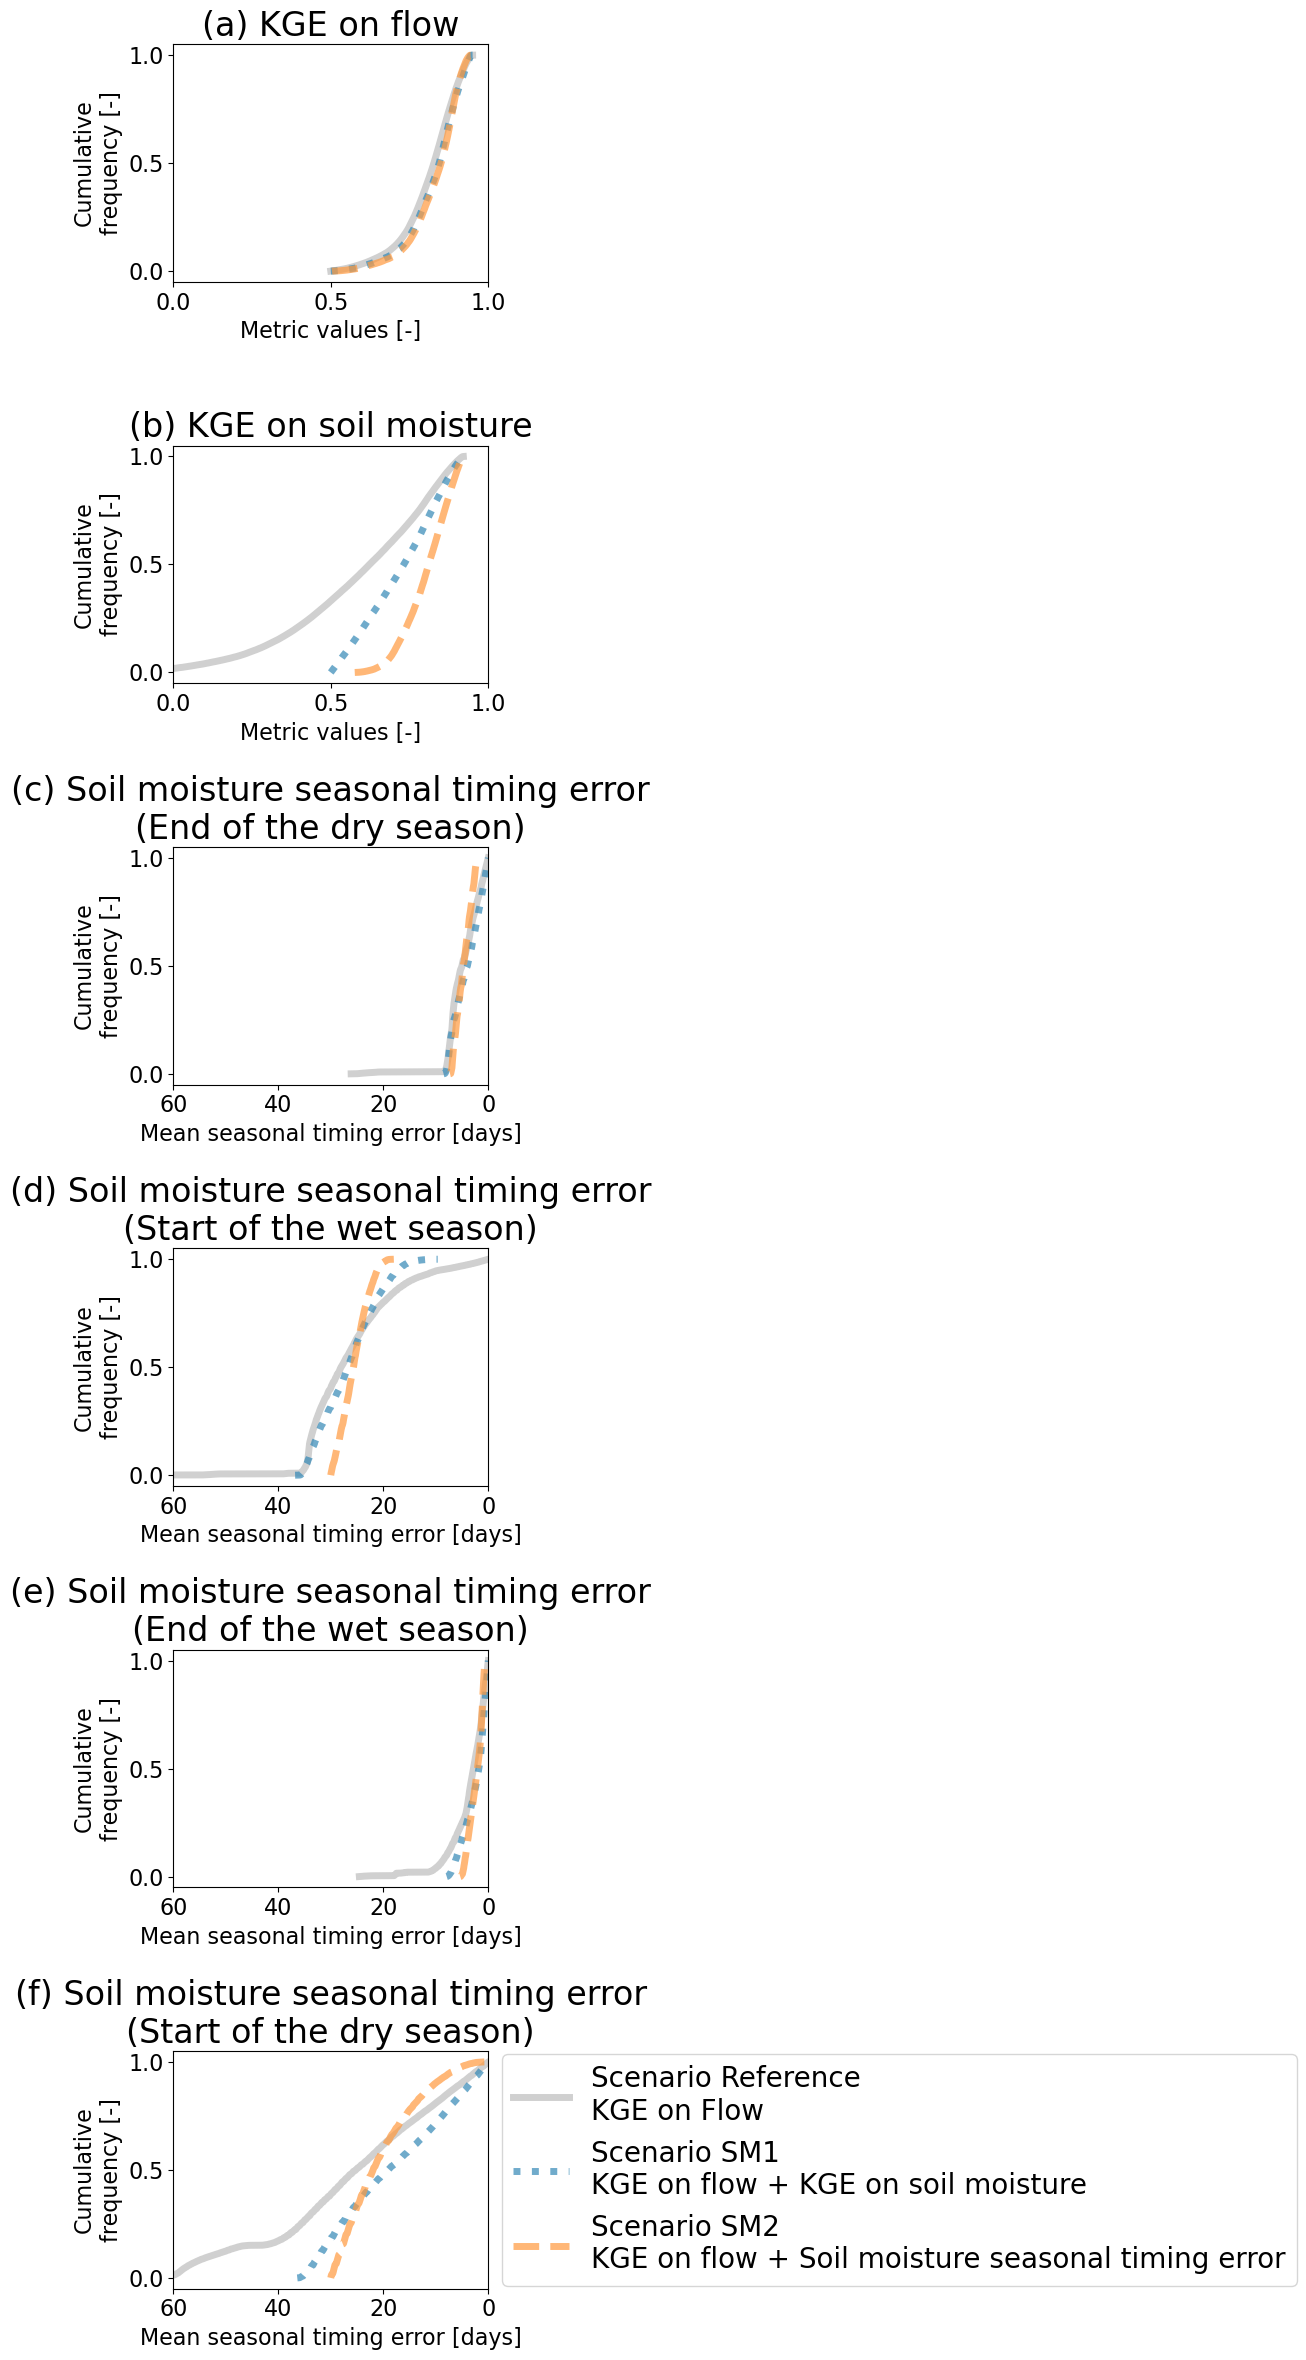

In [9]:
# Create a mapping between fig_title and eval_results_names
title_to_columnname = {
    '(a) KGE on flow': 'KGE on Flow',
    '(b) KGE on soil moisture': 'KGE on Soil',
    '(c) Soil moisture seasonal timing error\n(End of the dry season)': 'SeasonTrans of Soil dry2wet_start',
    '(d) Soil moisture seasonal timing error\n(Start of the wet season)': 'SeasonTrans of Soil dry2wet_end',
    '(e) Soil moisture seasonal timing error\n(End of the wet season)': 'SeasonTrans of Soil wet2dry_start',
    '(f) Soil moisture seasonal timing error\n(Start of the dry season)': 'SeasonTrans of Soil wet2dry_end'
}

num_subplots = len(title_to_columnname)
fig, axs = plt.subplots(num_subplots, 1, figsize=(5, 4*num_subplots))

# Iterate over the metrics
for idx, (title, column_name) in enumerate(title_to_columnname.items()):
    ax = axs[idx]
    plt.rc('font', size=20)

    # Iterate over criteria
    for i in range(1, n_criteria+1):
        data = eval_results[eval_results['criteria_id'] == i].copy()
        data_np = data[column_name].values

        #sort data
        x = np.sort(data_np)
        
        if 'SeasonTrans' in column_name:
            x = x[::-1]

        #calculate CDF values
        y = 1. * np.arange(len(x)) / (len(x) - 1)
        
        #plot CDF
        if i == 1:
            linestyle='-'
        elif i== 2:
            linestyle=':'
        elif i==3:
            linestyle = '--'

        if column_name ==  'SeasonTrans of Soil dry2wet_start':
            print("stop")
        ax.plot(x, y, label=f"{senario_short_names[i-1]}\n{senario_names[i-1]}", linewidth=5, alpha=0.7, linestyle=linestyle)
        
    if 'SeasonTrans' in column_name:
        ax.set_xlim([0, 60])
        ax.set_xlabel('Mean seasonal timing error [days]')
        ax.invert_xaxis()
    else:
        ax.set_xlabel('Metric values [-]')
        ax.set_xlim([0, 1])
    ax.set_title(title)
    ax.set_ylabel('Cumulative\nfrequency [-]')
fig.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

output_dir_cdfs = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\figs\fig6_evalCDFs"
fig.savefig(os.path.join(output_dir_cdfs, f'evalCDFs_{site}.pdf'), dpi=600, bbox_inches='tight')


## Load monthly evaluation metrics

In [10]:
for i in range(1, n_criteria+1):
    _eval_results_monthly = pd.read_csv(os.path.join(input_dir, f'criteria_{i}', 'post_evaluations_monthly_metrics.csv'), index_col=0)
    _eval_results_monthly.index = pd.to_datetime(_eval_results_monthly.Time, format="%Y-%m-%d")
    _eval_results_monthly['criteria_id'] = i
    _eval_results_monthly['Month'] = _eval_results_monthly.index.month
    if i==1:
        eval_results_monthly = _eval_results_monthly
    else:
        eval_results_monthly = pd.concat([eval_results_monthly, _eval_results_monthly])

In [11]:
eval_results_monthly['Q_mean_bias'] = eval_results_monthly['Q_mean_sim'] - eval_results_monthly['Q_mean_obs']
eval_results_monthly['high_flow_freq_bias'] = eval_results_monthly['high_flow_freq_sim'] - eval_results_monthly['high_flow_freq_obs']
eval_results_monthly['RR_bias'] = eval_results_monthly['RR_sim'] - eval_results_monthly['RR_obs']
eval_results_monthly

,Time,Q_mean_obs,Q_mean_sim,high_flow_freq_obs,high_flow_freq_sim,RR_obs,RR_sim,criteria_id,Month,Q_mean_bias,high_flow_freq_bias,RR_bias
Time,,,,,,,,,,,,
1998-02-28,1998-02-28,NaN,NaN,0.000000,0.000000,NaN,NaN,1,2,NaN,0.000000,NaN
1998-03-31,1998-03-31,0.021033,0.019426,0.032258,0.000000,0.162265,0.149866,1,3,-0.001607,-0.032258,-0.012399
1998-04-30,1998-04-30,0.011158,0.004149,0.000000,0.000000,0.161294,0.059968,1,4,-0.007010,0.000000,-0.101327
1998-05-31,1998-05-31,0.030843,0.011195,0.000000,0.000000,0.310268,0.112619,1,5,-0.019648,0.000000,-0.197649
1998-06-30,1998-06-30,0.092668,0.111156,0.066667,0.066667,0.545168,0.653929,1,6,0.018487,0.000000,0.108761
...,...,...,...,...,...,...,...,...,...,...,...,...
2001-05-31,2001-05-31,0.215132,0.233128,0.290323,0.354839,0.582068,0.630760,3,5,0.017996,0.064516,0.048692
2001-06-30,2001-06-30,0.067392,0.081730,0.000000,0.000000,0.905890,1.098633,3,6,0.014339,0.000000,0.192743
2001-07-31,2001-07-31,0.078031,0.074059,0.096774,0.032258,0.595457,0.565151,3,7,-0.003971,-0.064516,-0.030306


# Load and plot timeseries data

## Load quantiles    

In [12]:
def read_quantile_data(var_name):
    for i in range(1, n_criteria+1):
        _df = pd.read_csv(os.path.join(input_dir, f'criteria_{i}', f'quantiles_{var_name}.csv'), index_col=0, parse_dates=True)
        _df['criteria_id'] = i
        if i==1:
            df = _df
        else:
            df = pd.concat([df, _df])
    return df

In [13]:
results_quantile_Q = read_quantile_data("Q")
results_quantile_SM = read_quantile_data("SM")

In [14]:
site_name = case.split('-')[0]
if site_name == "Coweeta":
    obs_file_name = "test_daily_2014_2018_sm_basinavg.csv"
elif site_name == "Mahurangi":
    obs_file_name = "test_daily_1998_2001_sm_basinavg.csv"

obs = pd.read_csv(os.path.join(home_dir, "data", site_name, obs_file_name))
obs["Time"] = pd.to_datetime(obs["Time"], format="%Y-%m-%d")
obs.set_axis(obs["Time"], axis=0, inplace=True)
obs

,Time,Rainfall,Flow,Soil Moisture Content,Direct Runoff,GIUH Runoff,Lateral Flow,Base Flow,Total Discharge,Timestep
Time,,,,,,,,,,
1998-02-20,1998-02-20,0.000173,0.000104,0.352933,0,0,0,0,1.351006,0
1998-02-21,1998-02-21,0.018809,0.000178,0.356116,0,0,0,0,2.307010,1
1998-02-22,1998-02-22,0.012084,0.001555,0.370902,0,0,0,0,20.154086,2
1998-02-23,1998-02-23,0.010793,0.000396,0.370510,0,0,0,0,5.134022,3
1998-02-24,1998-02-24,0.019835,0.001187,0.382052,0,0,0,0,15.381066,4
...,...,...,...,...,...,...,...,...,...,...
2001-09-02,2001-09-02,0.016266,0.036170,0.471891,0,0,0,0,468.697009,1290
2001-09-03,2001-09-03,0.000507,0.004749,0.459832,0,0,0,0,61.536264,1291
2001-09-04,2001-09-04,0.087382,0.044785,0.465779,0,0,0,0,580.336488,1292


## Plot quantiles

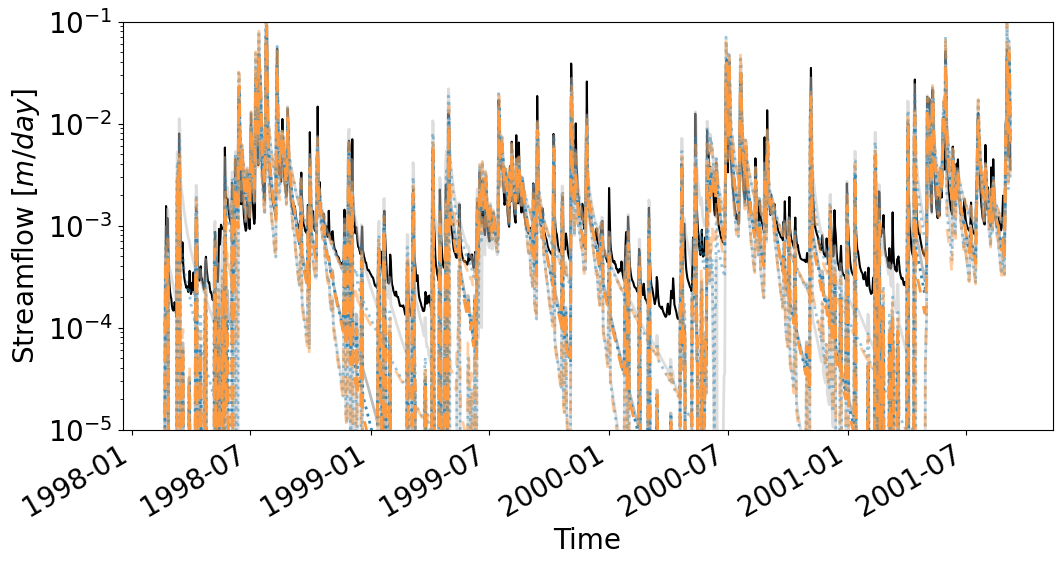

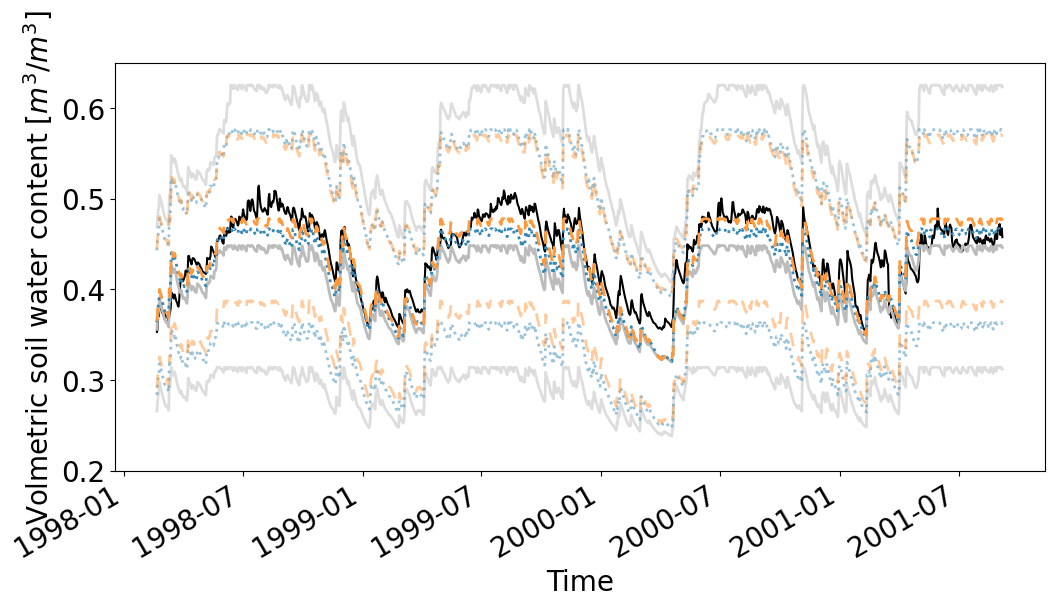

In [15]:
# Flow Plot
if site_name == "Mahurangi":
    ylim_flow = [1E-5, 1E-1]
    ylim_sm = [0.2, 0.65]
    xlim = ['2000-03-01', '2001-02-28']
elif site_name == "Coweeta":
    ylim_flow =  [5E-5, 3E-2]
    ylim_sm = [0, 0.6]
    xlim = ['2016-11-01', '2017-10-30']

def plot_time_series(data, obs_data, var_name, ylim):
    # plot_title = f'Predicted ranges ({quantiles[0]}, {quantiles[-1]} percentiles)'

    plt.rcParams.update({'font.size':20})
    f = plt.figure(figsize=(12, 6))
    ax = f.add_subplot()
    ax.plot(obs_data["Time"], obs_data[var_name], color='k', label='Observed')
    
    for i in range(1, n_criteria+1):
        if i == 1:
            linestyle='-'
        elif i== 2:
            linestyle=':'
        elif i==3:
            linestyle =  (0, (5, 5))
    
        df_simrange = data[data['criteria_id'] == i].copy()
        # plt.fill_between(df_simrange.index, df_simrange['upperlim'], df_simrange['lowerlim'], facecolor=color[i-1], alpha=0.2, interpolate=True, label=f"Senario {senario_short_names[i-1]}\n({senario_names[i-1]})")
        df_simrange['median'].plot(color=color[i-1], alpha=1, ax=ax, linewidth=2, linestyle=linestyle, label=f"{senario_short_names[i-1]}:\n{senario_names[i-1]}\nMedian")
        df_simrange['upperlim'].plot(color=color[i-1], alpha=0.5, ax=ax, linewidth=2, linestyle=linestyle, label=f'{quantiles[0]}th, {quantiles[-1]}th percentiles')
        df_simrange['lowerlim'].plot(color=color[i-1], alpha=0.5, ax=ax, linewidth=2, linestyle=linestyle, label='_Hidden')
        
    ax.set_ylim(ylim)
    # ax.set_xlim(xlim)
    ax.set_xlabel('Time')
    if var_name == "Flow":
        ylabel =  r'Streamflow $[m/day]$'
    elif var_name == "Soil Moisture Content":
        ylabel = r"Volmetric soil water content $[m^3/m^3]$"
    ax.set_ylabel(ylabel)
    if var_name == "Flow":
        ax.set_yscale('log')
    # ax.set_title(plot_title)
    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    f.autofmt_xdate()

    return f, ax


# Flow Duration Curve Plot
f, ax = plot_time_series(results_quantile_Q, obs, "Flow", ylim_flow)
output_fig_dir = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\figs\fig5_Q"
f.savefig(os.path.join(output_fig_dir, f'timeseries_Q_{site}.pdf'), dpi=600, bbox_inches='tight')

# Soil Moisture Cumulative Frequency Curve Plot
f, ax = plot_time_series(results_quantile_SM, obs, "Soil Moisture Content", ylim_sm)
output_fig_dir = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\figs\fig4_SM"
f.savefig(os.path.join(output_fig_dir, f'timeseries_SM_{site}.pdf'), dpi=600, bbox_inches='tight')

## Plot quantiles in FDC

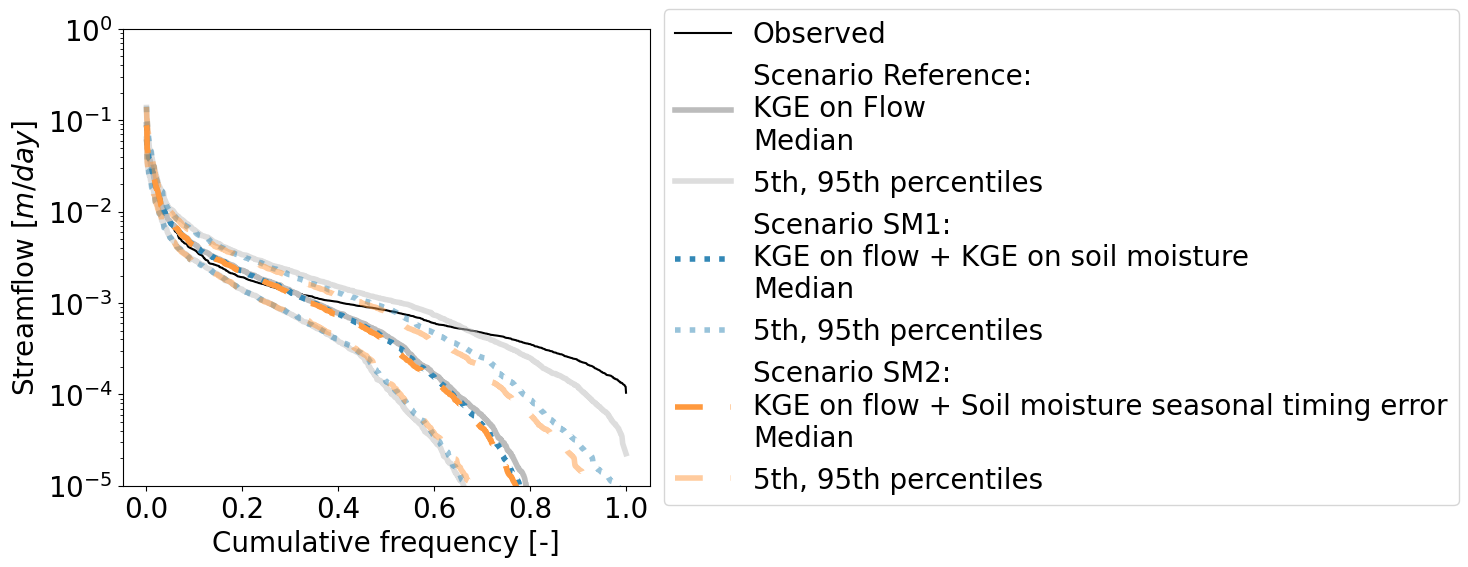

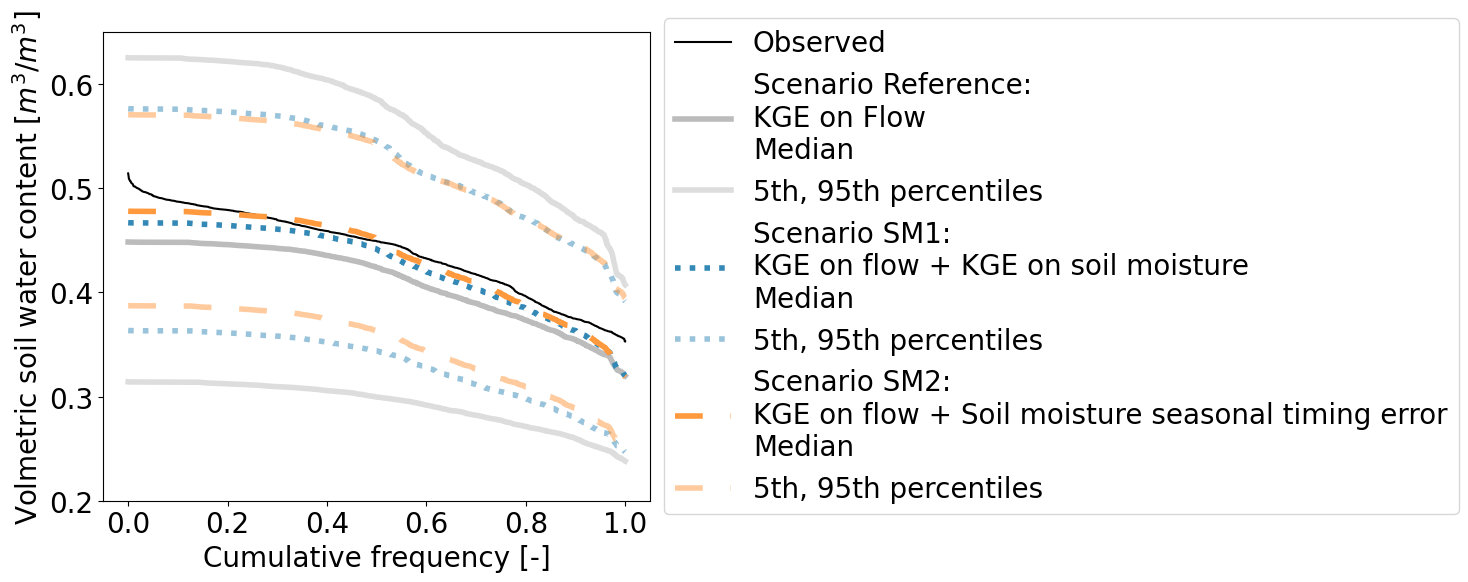

In [16]:
# Flow Plot
if site_name == "Mahurangi":
    ylim_flow = [1E-5, 1E-0]
    ylim_sm = [0.2, 0.65]
elif site_name == "Coweeta":
    ylim_flow =  [5E-5, 1E-1]
    ylim_sm = [0, 0.6]

def plot_fdc(data, obs_data, var_name, ylim):
    plt.rcParams.update({'font.size':20})
    f = plt.figure(figsize=(7, 6))
    ax = f.add_subplot()

    # Observed data plot
    obs_fdc_x = np.sort(obs_data[var_name].values)[::-1]
    obs_fdc_y = np.arange(len(obs_fdc_x)) / (len(obs_fdc_x) - 1)
    ax.plot(obs_fdc_y, obs_fdc_x, color='k', label='Observed')

    # Scenario plots
    for i in range(1, n_criteria+1):
        df_simrange = data[data['criteria_id'] == i].copy()

        if i == 1:
            linestyle='-'
        elif i== 2:
            linestyle=':'
        elif i==3:
            linestyle = (0, (5, 5)) #'--'

        for quantile in ['median', 'upperlim', 'lowerlim']:
            fdc_x = np.sort(df_simrange[quantile].values)[::-1]
            fdc_y = np.arange(len(fdc_x)) / (len(fdc_x) - 1)
            if quantile == 'median':
                ax.plot(fdc_y, fdc_x, color=color[i-1], alpha=1.0, linewidth=4,  linestyle=linestyle, label=f"{senario_short_names[i-1]}:\n{senario_names[i-1]}\nMedian")
            elif quantile=='upperlim':
                ax.plot(fdc_y, fdc_x, color=color[i-1], alpha=0.5, linestyle=linestyle, label=f'{quantiles[0]}th, {quantiles[-1]}th percentiles', linewidth=4)
            else:
                ax.plot(fdc_y, fdc_x, color=color[i-1], alpha=0.5, linestyle=linestyle, label='_Hidden', linewidth=4)

    if var_name == "Flow":
        ylabel =  r'Streamflow $[m/day]$'
    elif var_name == "Soil Moisture Content":
        ylabel = r"Volmetric soil water content $[m^3/m^3]$"
    ax.set_ylabel(ylabel)
    if var_name == "Flow":
        ax.set_yscale('log')

    ax.set_ylim(ylim)
    ax.set_xlabel('Cumulative frequency [-]')
    ax.set_ylabel(ylabel)
    title = f'Predicted Ranges of {var_name}'
    f.tight_layout()
    # ax.set_title(title)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return f, ax

# Assuming that the necessary data and variables (like senario_short_names, senario_names, results_quantile_Q, results_quantile_SM, obs, and output_dir) are defined

# Flow Duration Curve Plot
f, ax = plot_fdc(results_quantile_Q, obs, 'Flow', ylim_flow)
output_fig_dir = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\figs\fig5_Q"
f.savefig(os.path.join(output_fig_dir, f'FDC_Q_{site}.pdf'), dpi=600, bbox_inches='tight')

# Soil Moisture Cumulative Frequency Curve Plot
output_fig_dir = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\figs\fig4_SM"
f, ax = plot_fdc(results_quantile_SM, obs, 'Soil Moisture Content', ylim_sm)
f.savefig(os.path.join(output_fig_dir, f'FDC_SM_{site}.pdf'), dpi=600, bbox_inches='tight')
